# Predicting the city_cycle fuel consumption in miles per gallon

In [48]:
active_imports()

import pandas as pd
import numpy as np


['import pandas as pd', 'import numpy as np']

In [49]:
#import packages
import os
import requests

#import warning
from warnings import filterwarnings
filterwarnings('ignore')

def load_dataset(path, urls):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        data = requests.get(url).content
        filename = os.path.join(path, os.path.basename(url))
        with open(filename, "wb") as file:
            file.write(data)

In [50]:
urls = ['https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
        'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names']

load_dataset('data', urls)

In [51]:
data = pd.read_csv('data/auto-mpg.data', header=None, delim_whitespace=True)

In [52]:
data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Data wrangling

In [53]:
missing_values = '?'
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv('data/auto-mpg.data', names=columns, na_values='?', delim_whitespace=True)

In [54]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [55]:
data.shape

(398, 9)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [57]:
data1 = data.drop('car_name', axis=1)

### change dtypes of some features

In [58]:
data1['cylinders'] = data1['cylinders'].astype('category')

In [59]:
data1['origin'] = data1['origin'].astype('category')

In [60]:
data1['model_year'] = data1['model_year'].astype('category')

In [61]:
data1['origin'].unique()

[1, 3, 2]
Categories (3, int64): [1, 3, 2]

Text(0.5, 1, 'auto_correlation')

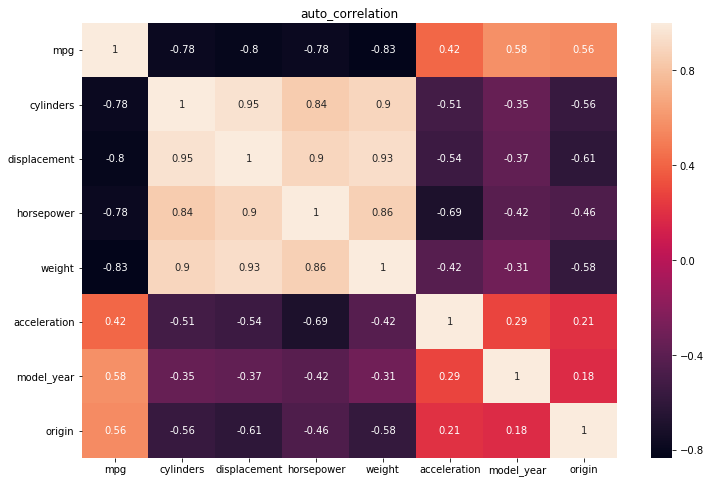

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(12, 8))
corr = data.corr().round(3)
sns.heatmap(corr, annot=True).set_title('auto_correlation')

In [63]:
data2 = data1.copy()

# separating the feature vecotrs and the target values
X = data2.drop('mpg', axis =1)
y = data2['mpg']

X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), "train +", len(y_test), "test")

278 train + 120 test


## Prepare the data for Machine Learning Algorithms
    . Data cleaning
    . Handling categorical and numeric features
    . Transformers
    . Feature scaling
    . Transformation pipelines

In [65]:
# Create pipeline for both numeric and categorical features
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression


numeric_features = ['displacement', 'horsepower', 'weight', 'acceleration']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['origin', 'cylinders', 'model_year']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

auto_prepared = preprocessor.fit_transform(data2)

# Append classifier to preprocessing pipeline
# Now we have a full prediction pipeline
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [66]:
auto_prepared.shape

(398, 25)

## Select and train your models

In [67]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, MultiTaskLasso, BayesianRidge, LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC, SVR, NuSVC
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [68]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [69]:
from sklearn.tree import DecisionTreeRegressor

dtr_reg = DecisionTreeRegressor(max_depth=3)
dtr_reg.fit(auto_prepared, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [70]:
from sklearn.metrics import mean_squared_error

auto_predictions = dtr_reg.predict(auto_prepared)
dtr_mse = mean_squared_error(y, auto_predictions)
dtr_rmse = np.sqrt(dtr_mse)
dtr_rmse

3.6478597704073814

In [71]:
from sklearn.utils import check_array
def mean_absolute_percentage_error(y, auto_predictions): 
    y, auto_predictions = np.array(y), np.array(auto_predictions)
    return np.mean((np.abs((y - auto_predictions) / y)) * 100)

dtr_mape = mean_absolute_percentage_error(y, auto_predictions)
print(dtr_mape)

11.68461005649996


In [72]:
from sklearn.model_selection import cross_val_score

dtr_scores = cross_val_score(dtr_reg, auto_prepared, y, scoring="neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)
display_scores(dtr_rmse_scores) # greater is better

Scores: [3.17688574 4.88043579 4.46088471 2.99545304 3.60739524 2.79896353
 3.99539581 4.6928693  8.61416299 6.54696644]
Mean: 4.576941259477151
Standard deviation: 1.70879652861603


In [73]:
from sklearn.linear_model import Ridge

rid_reg = Ridge(alpha=1, solver='sag')
rid_reg.fit(auto_prepared, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='sag', tol=0.001)

In [74]:
from sklearn.metrics import mean_squared_error

auto_predictions = rid_reg.predict(auto_prepared)
rid_mse = mean_squared_error(y, auto_predictions)
rid_rmse = np.sqrt(rid_mse)
rid_rmse

2.787612938037346

In [75]:
from sklearn.utils import check_array
def mean_absolute_percentage_error(y, auto_predictions): 
    y, auto_predictions = np.array(y), np.array(auto_predictions)
    return np.mean((np.abs((y - auto_predictions) / y)) * 100)

rid_mape = mean_absolute_percentage_error(y, auto_predictions)
print(rid_mape)

9.376744476307671


In [76]:
from sklearn.model_selection import cross_val_score

rid_scores = cross_val_score(rid_reg, auto_prepared, y, scoring="neg_mean_squared_error", cv=10)
rid_rmse_scores = np.sqrt(-rid_scores)
display_scores(rid_rmse_scores) # greater is better

Scores: [3.28500697 2.37099086 2.87591549 2.68848916 2.61904447 2.69679649
 3.65220878 4.11944103 4.96136097 5.85944175]
Mean: 3.51286959682703
Standard deviation: 1.0907746406388308


In [77]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2', eta0=0.05)
sgd_reg.fit(auto_prepared, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [78]:
from sklearn.metrics import mean_squared_error

auto_predictions = sgd_reg.predict(auto_prepared)
sgd_mse = mean_squared_error(y, auto_predictions)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

2.8188696484370395

In [79]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_reg, auto_prepared, y, scoring="neg_mean_squared_error", cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)
display_scores(sgd_rmse_scores) # greater is better

Scores: [1.77264867 2.16526613 3.1481309  2.39455634 2.65655287 2.85743123
 4.59548723 5.82343566 5.13596503 7.69529892]
Mean: 3.8244772979575403
Standard deviation: 1.8181825341499493


In [80]:
gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(auto_prepared, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
from sklearn.metrics import mean_squared_error

auto_predictions = gbr_reg.predict(auto_prepared)
gbr_mse = mean_squared_error(y, auto_predictions)
gbr_rmse = np.sqrt(gbr_mse)
gbr_rmse

1.5782321262492764

In [82]:
from sklearn.model_selection import cross_val_score

gbr_scores = cross_val_score(gbr_reg, auto_prepared, y, scoring="neg_mean_squared_error", cv=10)
gbr_rmse_scores = np.sqrt(-gbr_scores)
display_scores(gbr_rmse_scores) # greater is better

Scores: [2.92777637 3.29017058 3.12414046 3.17907461 3.09493745 2.24511523
 3.70060478 4.3694819  5.9955669  6.69417331]
Mean: 3.862104158291102
Standard deviation: 1.3516725693013056


In [83]:
xgb_reg = xgb.XGBRegressor(objective= 'reg:squarederror', alpha=10, n_estimators=100)
xgb_reg.fit(auto_prepared, y)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [84]:
from sklearn.metrics import mean_squared_error

auto_predictions = xgb_reg.predict(auto_prepared)
xgb_mse = mean_squared_error(y, auto_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

1.694376864883841

In [85]:
from sklearn.model_selection import cross_val_score

xgb_scores = cross_val_score(xgb_reg, auto_prepared, y, scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores) # greater is better

Scores: [2.33992609 3.34488625 3.30593012 2.73414653 3.03527535 2.12070206
 3.56770719 3.86768011 5.76772379 6.75122733]
Mean: 3.6835204810569
Standard deviation: 1.4010169092096305


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#params = {'n_estimators':np.arange(20,81,10),
          #'criterion': ['friedman_mse'],
          #'max_depth': [4]}
params = { 'n_estimators': np.arange(20, 80, 10), 'max_depth': [3], 'learning_rate': [0.1]}                        

gb_clf = GradientBoostingRegressor()

grid_search = GridSearchCV(gb_clf, param_grid=params, scoring='neg_mean_squared_error', n_jobs=4, iid=False, cv=5)

grid_search.fit(auto_prepared, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [87]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [88]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.756072689957502 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}
4.548809807703309 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 30}
4.465701028608081 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}
4.429989941404912 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
4.432653534921976 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}
4.432131491485782 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 70}


In [90]:
from sklearn.metrics import mean_squared_error

final_model = grid_search.best_estimator_

X_test = data1.drop('mpg', axis=1)
y_test = data1['mpg'].copy()

X_test_prepared = preprocessor.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
print(final_mse)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

4.128916794785023
2.0319736205928027
